# Gold Price Preiction through machine Learning (Regression)

In [3]:
#  Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# model importing
from sklearn.linear_model import LinearRegression

#time stamp
import time
print("Last Updated",time.asctime())

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#model testing
from sklearn.metrics import mean_squared_error, r2_score

#split the dataset
from sklearn.model_selection import train_test_split

#preprocessing
from sklearn.preprocessing import LabelEncoder

Last Updated Sat Oct 11 13:47:43 2025


### 1. Problem Formulation

Predicting gold prices is a critical task for investors, traders, and policymakers, as gold often acts as a hedge against inflation and market volatility. Traditional forecasting methods depend on manual analysis of financial indicators and macroeconomic trends, which can be inconsistent and slow to adapt to dynamic market conditions.
A machine learning–based predictive system can utilize multiple influencing factors — such as stock indices (S&P 500, Dow Jones), currency exchange rates, and commodity trends — to forecast gold prices more accurately. This helps investors make data-driven decisions regarding when to buy or sell gold.

### 2. Variables
Independent Features (Inputs):

SP_Close: Closing value of the S&P 500 index, representing overall market sentiment.

DJ_Close: Closing value of the Dow Jones Industrial Average, reflecting broader U.S. stock performance.

USDI_Price: U.S. Dollar Index value, indicating the relative strength of the dollar.

EU_Price: Euro price level, showing changes in major currency exchange trends.

PLT_Price: Platinum price, capturing movements in correlated precious metals.

USO_Close: Crude oil closing price, indicating macroeconomic and inflationary trends.

Volume: Trading volume of gold, reflecting market activity and liquidity.

Dependent Feature (Target):

Gold_Close (or Close): The daily closing price of gold, which the model aims to predict.

In [5]:
# Loading the dataset as a dataframe
df=pd.read_csv('data/FINAL_USO.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


## 3. Preparing & Analyzing Data

In [7]:
df.shape

(1718, 81)

In [8]:
# Checking for null values
df.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 81, dtype: int64

## Exploratory Data Analysis
#### RELATIONS BETWEEN FEATURES AND TARGET

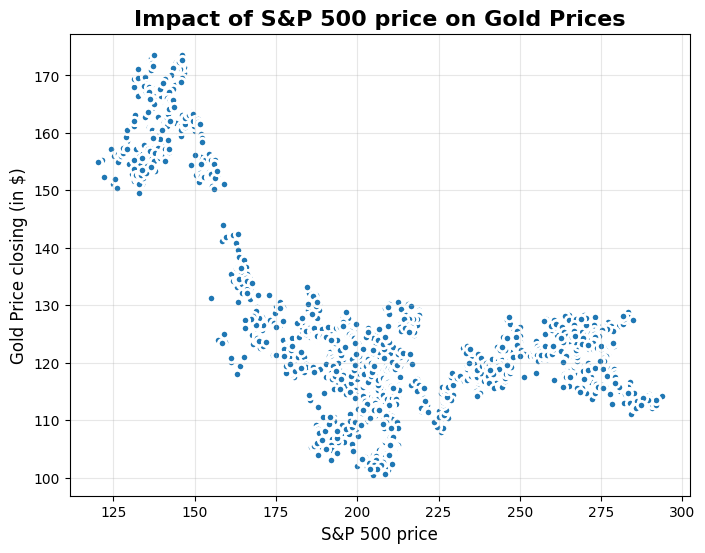

In [24]:
#SP_Close and Price Line chart
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df, 
    x='SP_close', 
    y='Close', 
    marker='o',       # add markers for clarity
    linewidth=2, 
)
# Titles and labels
plt.title("Impact of S&P 500 price on Gold Prices", fontsize=16, weight='bold')
plt.xlabel("S&P 500 price", fontsize=12)
plt.ylabel("Gold Price closing (in $)", fontsize=12)

# Add grid for readability
plt.grid(alpha=0.3)

# Rotate x-axis ticks if needed
plt.xticks(rotation=0)
plt.savefig('assets/S&P_price.png')
plt.show()


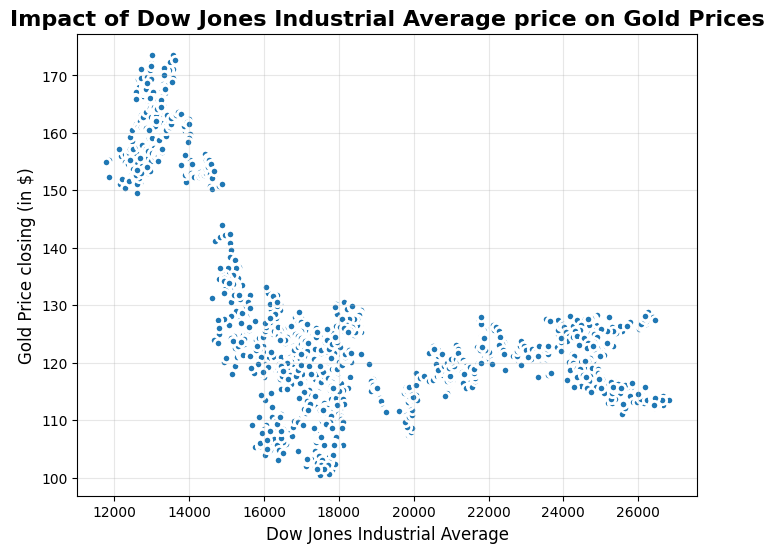

In [25]:
#DJ_Close and Price Line chart
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df, 
    x='DJ_close', 
    y='Close', 
    marker='o',       # add markers for clarity
    linewidth=2, 
)
# Titles and labels
plt.title("Impact of Dow Jones Industrial Average price on Gold Prices", fontsize=16, weight='bold')
plt.xlabel("Dow Jones Industrial Average", fontsize=12)
plt.ylabel("Gold Price closing (in $)", fontsize=12)

# Add grid for readability
plt.grid(alpha=0.3)

# Rotate x-axis ticks if needed
plt.xticks(rotation=0)
plt.savefig('assets/DJ_price.png')
plt.show()


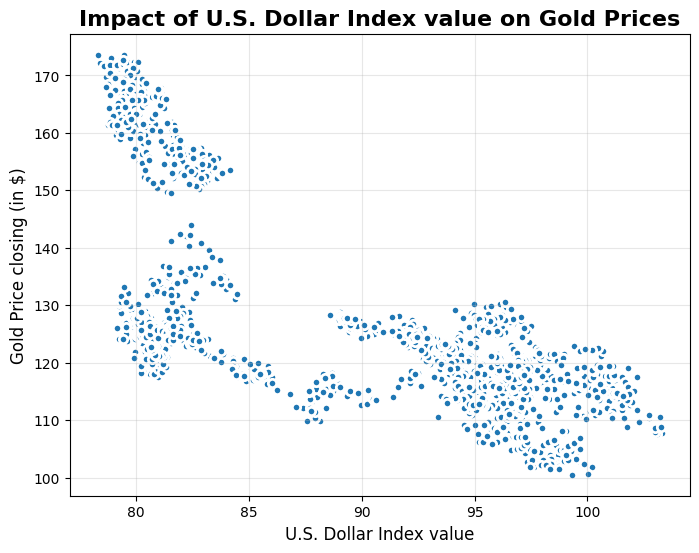

In [26]:
#USDI_Close and Price Line chart
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df, 
    x='USDI_Price', 
    y='Close', 
    marker='o',       # add markers for clarity
    linewidth=2, 
)
# Titles and labels
plt.title("Impact of U.S. Dollar Index value on Gold Prices", fontsize=16, weight='bold')
plt.xlabel("U.S. Dollar Index value", fontsize=12)
plt.ylabel("Gold Price closing (in $)", fontsize=12)

# Add grid for readability
plt.grid(alpha=0.3)

# Rotate x-axis ticks if needed
plt.xticks(rotation=0)
plt.savefig('assets/USDI_price.png')
plt.show()


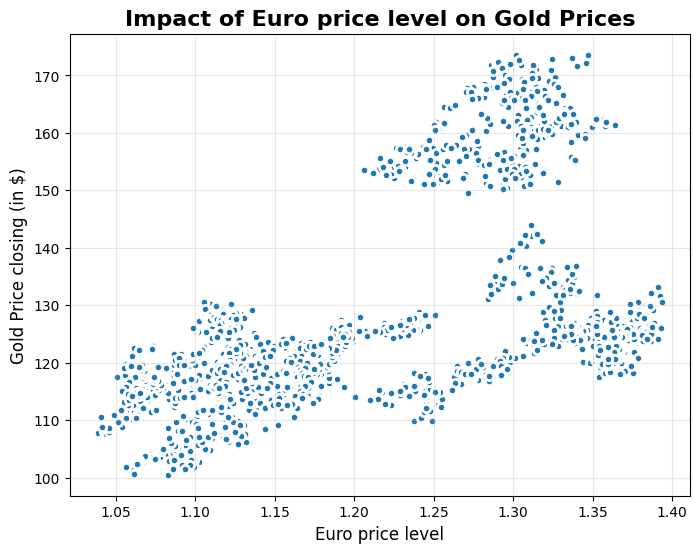

In [27]:
#EU and Price Line chart
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df, 
    x='EU_Price', 
    y='Close', 
    marker='o',       # add markers for clarity
    linewidth=2, 
)
# Titles and labels
plt.title("Impact of Euro price level on Gold Prices", fontsize=16, weight='bold')
plt.xlabel("Euro price level", fontsize=12)
plt.ylabel("Gold Price closing (in $)", fontsize=12)

# Add grid for readability
plt.grid(alpha=0.3)

# Rotate x-axis ticks if needed
plt.xticks(rotation=0)
plt.savefig('assets/EU_price.png')
plt.show()
    

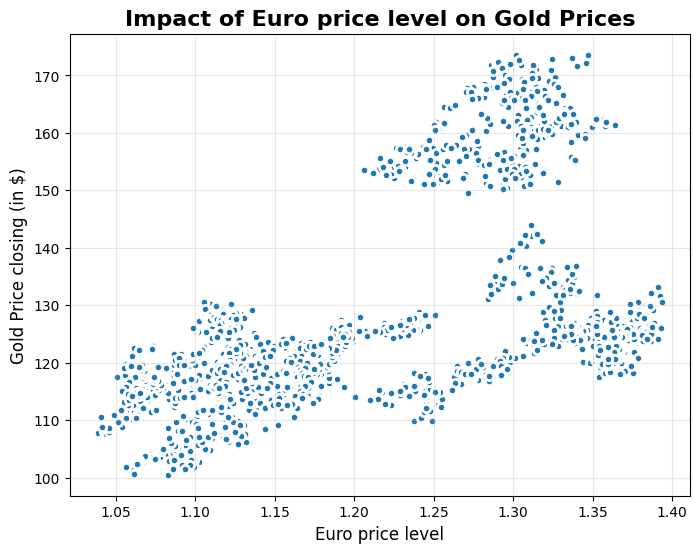

In [28]:
#Platinum price and Price Line chart
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df, 
    x='EU_Price', 
    y='Close', 
    linewidth=2, 
)
# Titles and labels
plt.title("Impact of Euro price level on Gold Prices", fontsize=16, weight='bold')
plt.xlabel("Euro price level", fontsize=12)
plt.ylabel("Gold Price closing (in $)", fontsize=12)

# Add grid for readability
plt.grid(alpha=0.3)

# Rotate x-axis ticks if needed
plt.xticks(rotation=0)
plt.savefig('assets/Plat_price.png')
plt.show()
    

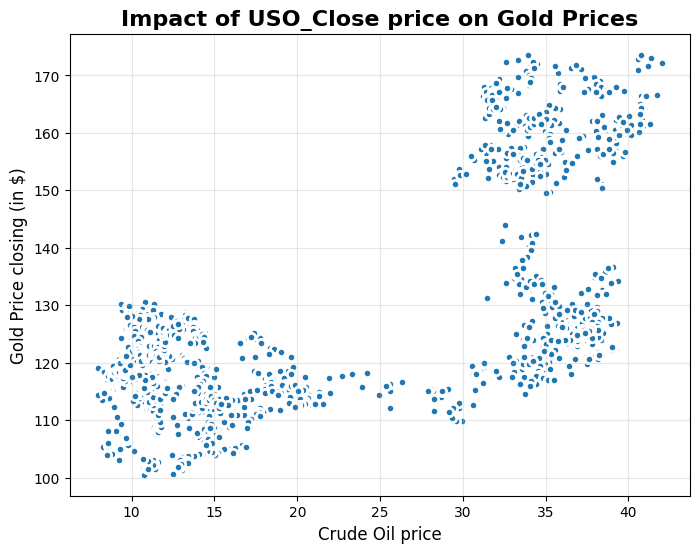

In [29]:
#Volume and Price Line chart
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df, 
    x='USO_Close', 
    y='Close', 
    linewidth=2, 
)
# Titles and labels
plt.title("Impact of USO_Close price on Gold Prices", fontsize=16, weight='bold')
plt.xlabel("Crude Oil price", fontsize=12)
plt.ylabel("Gold Price closing (in $)", fontsize=12)

# Add grid for readability
plt.grid(alpha=0.3)

# Rotate x-axis ticks if needed
plt.xticks(rotation=0)
plt.savefig('assets/USO_price.png')
plt.show()
    

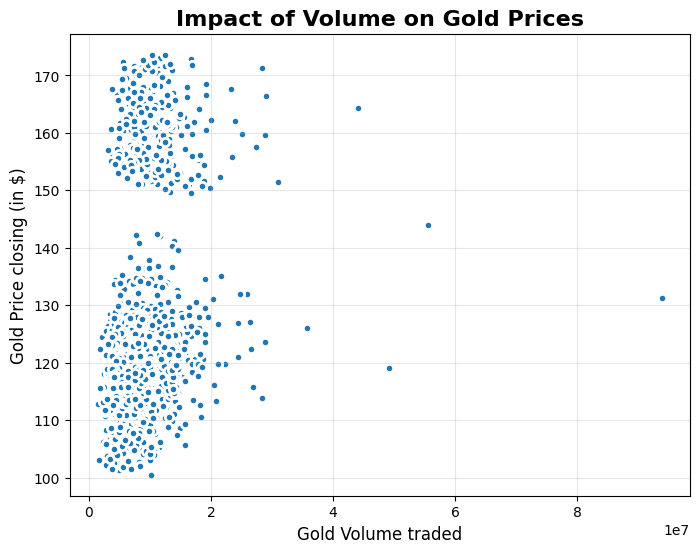

In [30]:
#Volume and Price Line chart
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df, 
    x='Volume', 
    y='Close', 
    linewidth=2, 
)
# Titles and labels
plt.title("Impact of Volume on Gold Prices", fontsize=16, weight='bold')
plt.xlabel("Gold Volume traded", fontsize=12)
plt.ylabel("Gold Price closing (in $)", fontsize=12)

# Add grid for readability
plt.grid(alpha=0.3)

# Rotate x-axis ticks if needed
plt.xticks(rotation=0)
plt.savefig('assets/vol_price.png')
plt.show()
    

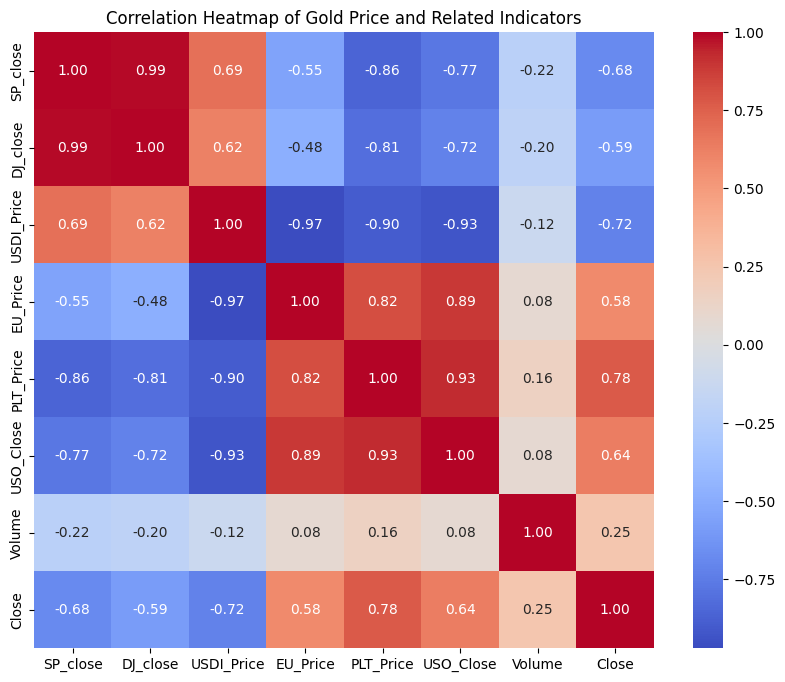

In [33]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset

# Convert Date to datetime and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Select relevant features
cols = ['SP_close', 'DJ_close', 'USDI_Price', 'EU_Price', 
        'PLT_Price', 'USO_Close', 'Volume', 'Close']

data = df[cols]

# Compute correlation matrix
corr = data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Gold Price and Related Indicators")
plt.show()


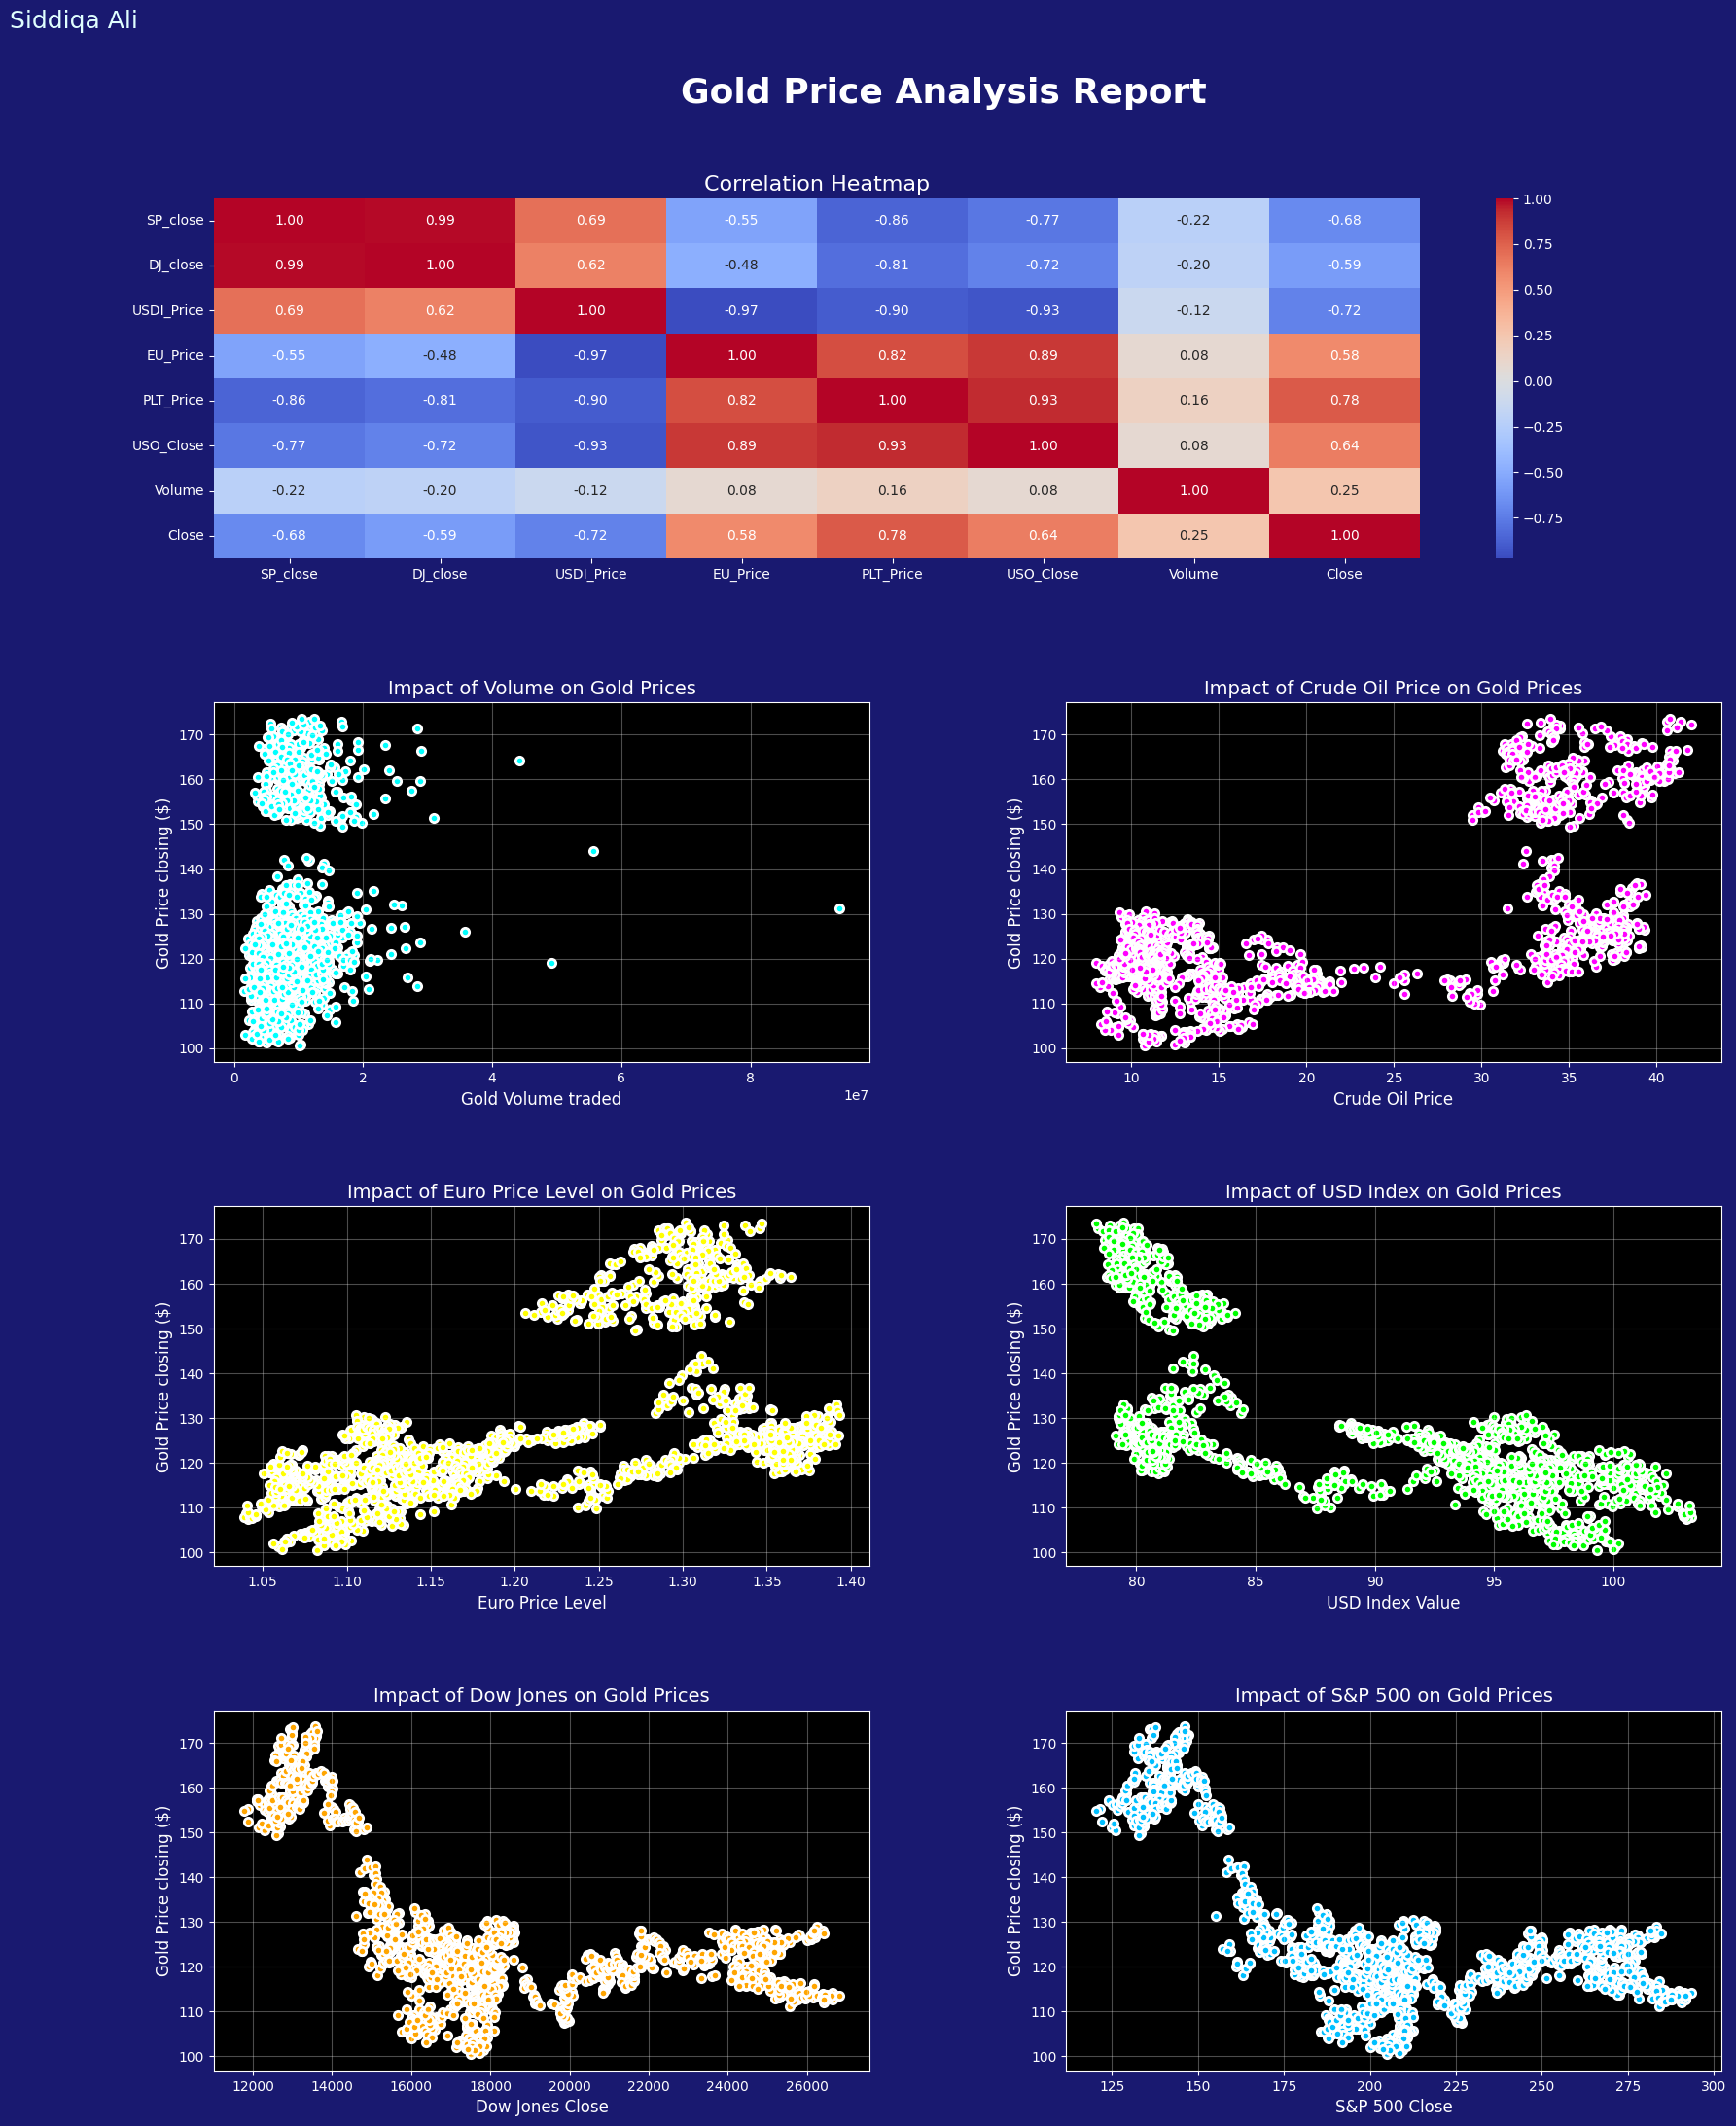

In [35]:
# combined report
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Set dark background
plt.style.use('dark_background')
sns.set_palette("cool")  # galaxy-style colors

# Create figure with gridspec
fig = plt.figure(figsize=(20, 25), facecolor='midnightblue')
gs = GridSpec(4, 2, figure=fig, hspace=0.4, wspace=0.3)

# Add heading and author
fig.suptitle("Gold Price Analysis Report", fontsize=26, fontweight='bold', color='white', y=0.93)
fig.text(0.02, 0.95, "Siddiqa Ali", fontsize=18, color='lightcyan')

# 1. Correlation heatmap
ax0 = fig.add_subplot(gs[0, :])
corr = df[['SP_close', 'DJ_close', 'USDI_Price', 'EU_Price', 'PLT_Price', 
           'USO_Close', 'Volume', 'Close']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", ax=ax0, cbar=True)
ax0.set_title("Correlation Heatmap", fontsize=16, color='white')

# 2. Volume vs Close
ax1 = fig.add_subplot(gs[1, 0])
sns.scatterplot(data=df, x='Volume', y='Close', ax=ax1, linewidth=2, color='cyan')
ax1.set_title("Impact of Volume on Gold Prices", fontsize=14, color='white')
ax1.set_xlabel("Gold Volume traded", fontsize=12, color='white')
ax1.set_ylabel("Gold Price closing ($)", fontsize=12, color='white')
ax1.grid(alpha=0.3)
ax1.tick_params(colors='white')

# 3. USO_Close vs Close
ax2 = fig.add_subplot(gs[1, 1])
sns.scatterplot(data=df, x='USO_Close', y='Close', ax=ax2, linewidth=2, color='magenta')
ax2.set_title("Impact of Crude Oil Price on Gold Prices", fontsize=14, color='white')
ax2.set_xlabel("Crude Oil Price", fontsize=12, color='white')
ax2.set_ylabel("Gold Price closing ($)", fontsize=12, color='white')
ax2.grid(alpha=0.3)
ax2.tick_params(colors='white')

# 4. EU_Price vs Close
ax3 = fig.add_subplot(gs[2, 0])
sns.scatterplot(data=df, x='EU_Price', y='Close', ax=ax3, linewidth=2, color='yellow')
ax3.set_title("Impact of Euro Price Level on Gold Prices", fontsize=14, color='white')
ax3.set_xlabel("Euro Price Level", fontsize=12, color='white')
ax3.set_ylabel("Gold Price closing ($)", fontsize=12, color='white')
ax3.grid(alpha=0.3)
ax3.tick_params(colors='white')

# 5. USDI_Price vs Close
ax4 = fig.add_subplot(gs[2, 1])
sns.scatterplot(data=df, x='USDI_Price', y='Close', ax=ax4, linewidth=2, color='lime')
ax4.set_title("Impact of USD Index on Gold Prices", fontsize=14, color='white')
ax4.set_xlabel("USD Index Value", fontsize=12, color='white')
ax4.set_ylabel("Gold Price closing ($)", fontsize=12, color='white')
ax4.grid(alpha=0.3)
ax4.tick_params(colors='white')

# 6. DJ_close vs Close
ax5 = fig.add_subplot(gs[3, 0])
sns.scatterplot(data=df, x='DJ_close', y='Close', ax=ax5, linewidth=2, color='orange')
ax5.set_title("Impact of Dow Jones on Gold Prices", fontsize=14, color='white')
ax5.set_xlabel("Dow Jones Close", fontsize=12, color='white')
ax5.set_ylabel("Gold Price closing ($)", fontsize=12, color='white')
ax5.grid(alpha=0.3)
ax5.tick_params(colors='white')

# 7. SP_close vs Close
ax6 = fig.add_subplot(gs[3, 1])
sns.scatterplot(data=df, x='SP_close', y='Close', ax=ax6, linewidth=2, color='deepskyblue')
ax6.set_title("Impact of S&P 500 on Gold Prices", fontsize=14, color='white')
ax6.set_xlabel("S&P 500 Close", fontsize=12, color='white')
ax6.set_ylabel("Gold Price closing ($)", fontsize=12, color='white')
ax6.grid(alpha=0.3)
ax6.tick_params(colors='white')

# Save the combined report
plt.savefig("assets/Gold_Price_Report.png", dpi=300, facecolor='midnightblue', bbox_inches='tight')
plt.show()


## Selecting correct Algorithm

In [38]:
# Splitting data 
# Splitting into x and y as well as train and test variables for each
x=df[['SP_close',      # S&P 500 closing price
    'DJ_close',      # Dow Jones closing price
    'USDI_Price',    # U.S. Dollar Index
    'EU_Price',      # Euro price level
    'PLT_Price',     # Platinum price
    'USO_Close',     # Crude Oil ETF closing price
    'Volume']]
y=df['Close']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [39]:
# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR



# List of models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}

results = []

# Train & evaluate all models
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    results.append((name, r2, rmse))

# Convert to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "R2_Score", "RMSE"])
results_df = results_df.sort_values(by="R2_Score", ascending=False)

print(results_df)

# Select best model
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name}")


               Model  R2_Score        RMSE
4      Random Forest  0.992012    2.111881
5  Gradient Boosting  0.982167    4.714747
3      Decision Tree  0.980319    5.203336
0  Linear Regression  0.919858   21.188803
1              Ridge  0.877262   32.450725
2              Lasso  0.849284   39.847729
6                SVR -0.005618  265.874957

Best Model: Random Forest


## Training the model

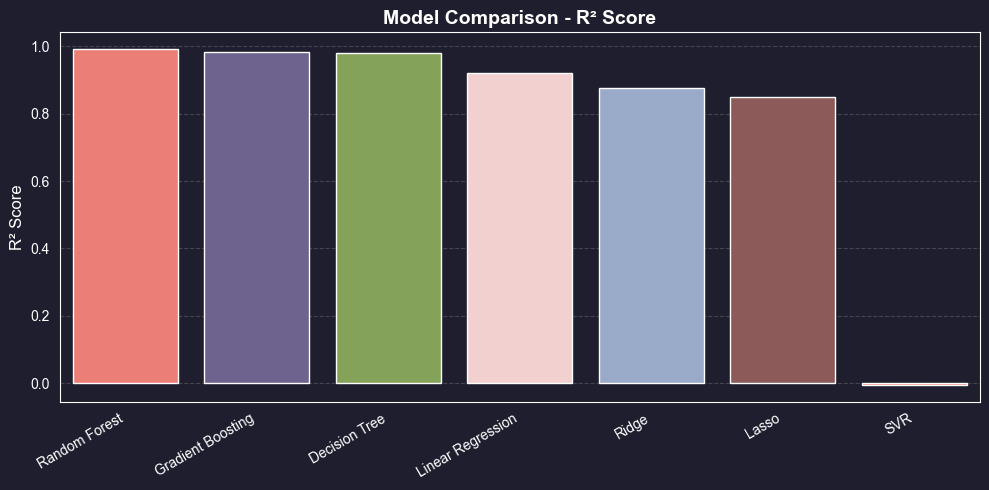

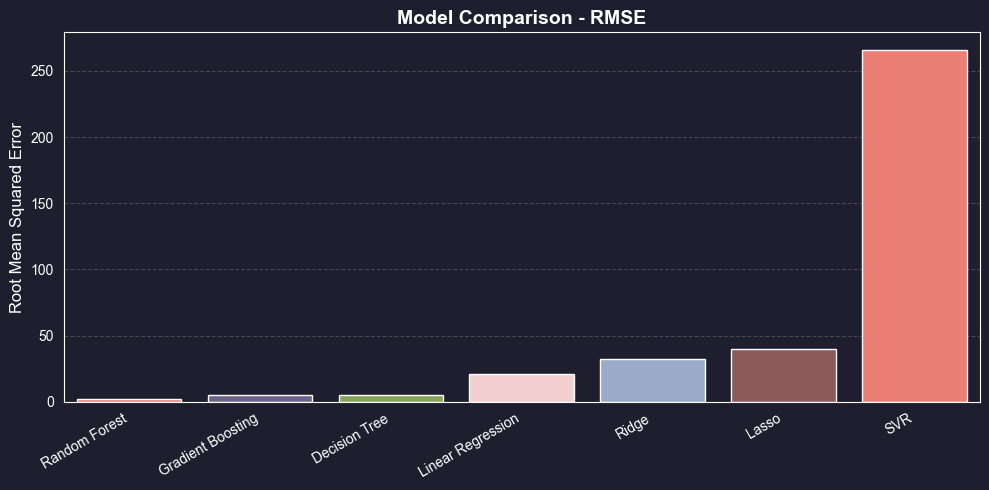

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a galaxy/dark palette
dark_colors = ["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1", "#955251"]

# Set dark style
sns.set_style("darkgrid")
plt.rcParams['axes.facecolor'] = '#1E1E2F'  # Dark background for axes
plt.rcParams['figure.facecolor'] = '#1E1E2F'  # Dark background for figure
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['text.color'] = 'white'
plt.rcParams['grid.color'] = 'gray'

# Barplot of R² Scores
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="R2_Score", data=results_df, palette=dark_colors)
plt.xticks(rotation=30, ha="right")
plt.title("Model Comparison - R² Score", fontsize=14, fontweight="bold", color="white")
plt.ylabel("R² Score", fontsize=12)
plt.xlabel("")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.savefig('assets/Model_Compare_R2_dark.png')
plt.show()

# Barplot of RMSE
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="RMSE", data=results_df, palette=dark_colors)
plt.xticks(rotation=30, ha="right")
plt.title("Model Comparison - RMSE", fontsize=14, fontweight="bold", color="white")
plt.ylabel("Root Mean Squared Error", fontsize=12)
plt.xlabel("")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.savefig('assets/Model_Compare_RMSE_dark.png')
plt.show()


In [40]:
model = RandomForestRegressor(
    n_estimators=100,      # number of trees
    max_depth=None,        # maximum depth of each tree, None = nodes expanded until all leaves are pure
    random_state=42,       # for reproducibility
    n_jobs=-1              # use all CPU cores
)

# Train the model
model.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## 6. Test the Model in Practice

In [41]:
# Store predictions in variable
y_pred=model.predict(x_test)
y_test,y_pred

(948     102.940002
 366     121.129997
 576     120.940002
 352     136.529999
 1173    121.110001
            ...    
 1067    120.099998
 106     154.649994
 1209    110.449997
 1563    122.360001
 133     151.050003
 Name: Close, Length: 344, dtype: float64,
 array([102.74219919, 122.83450025, 121.55809909, 143.01230217,
        117.98489986, 118.19369896, 105.87989983, 121.44730004,
        118.99370127, 161.20040187, 106.07919971, 127.53609828,
        108.80929971, 116.90550106, 125.87189954, 118.98640129,
        141.88300223, 126.05879999, 165.60660006, 115.22470107,
        114.02110044, 162.0456983 , 108.92720079, 120.69330032,
        112.88810084, 125.95799972, 127.39689854, 113.51120016,
        122.12529946, 120.20349907, 127.39770006, 114.90479995,
        111.29559998, 125.32370099, 111.5958008 , 118.08340033,
        119.92859999, 117.89339947, 117.18109985, 167.96850079,
        107.70769965, 117.29170157, 123.7774983 , 151.88969993,
        153.3830032 , 114.5549994

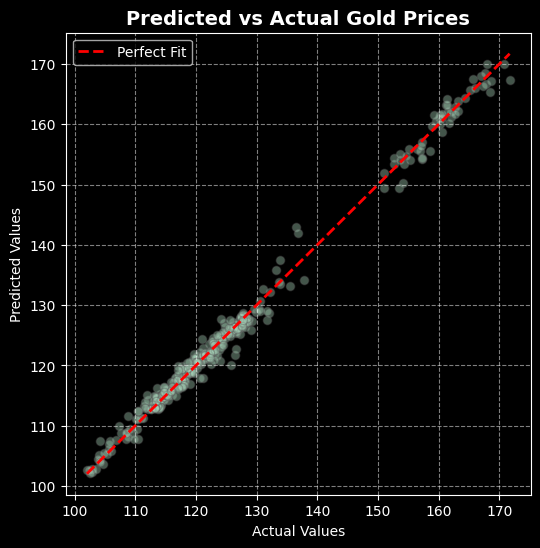

In [42]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4, color="#A8D5BA", edgecolor="#555555")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Fit")
plt.title("Predicted vs Actual Gold Prices", fontsize=14, fontweight="bold")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.savefig('assets/Predicted_vs_actual.png')

plt.show()


In [43]:
print("R^2 Score:",r2_score(y_test,y_pred))
print("RMSE:",mean_squared_error(y_test,y_pred))

R^2 Score: 0.9920122375609703
RMSE: 2.111880922941261


In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import joblib

# --------------------
# 1. Cross-validation (Optional)
# --------------------
cv_scores = cross_val_score(model, x, y, cv=5, scoring="r2")
print("Cross-validated R² scores:", cv_scores)
print("Mean CV R²:", round(cv_scores.mean(), 4))

# --------------------
# 2. Save Random Forest Model
# --------------------
joblib.dump(model, "random_forest_model.pkl")
print("✅ Random Forest model saved as random_forest_model.pkl")



Cross-validated R² scores: [-10.10209764  -2.36530063  -1.80430162  -1.35146029  -3.24106949]
Mean CV R²: -3.7728
✅ Random Forest model saved as random_forest_model.pkl
